In [1]:
pip install yfinance numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Download stock data for Amazon (AMZN) and ARAMCO (2222.SR)
amazon = yf.download('AMZN', start='2020-01-01', end='2024-01-01')
aramco = yf.download('2222.SR', start='2020-01-01', end='2024-01-01')

# Show the first few rows
print("Amazon Data:")
display(amazon.head())

print("\nAramco Data:")
display(aramco.head())

/var/folders/6_/v2cvbrv93vjb3p15tlntj0lr0000gn/T/ipykernel_64820/261963551.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amazon = yf.download('AMZN', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed
/var/folders/6_/v2cvbrv93vjb3p15tlntj0lr0000gn/T/ipykernel_64820/261963551.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aramco = yf.download('2222.SR', start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

Amazon Data:


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-01-02,94.900497,94.900497,93.207497,93.750000,80580000
2020-01-03,93.748497,94.309998,93.224998,93.224998,75288000
2020-01-06,95.143997,95.184502,93.000000,93.000000,81236000
2020-01-07,95.343002,95.694504,94.601997,95.224998,80898000
2020-01-08,94.598503,95.550003,94.321999,94.902000,70160000



Aramco Data:


Price,Close,High,Low,Open,Volume
Ticker,2222.SR,2222.SR,2222.SR,2222.SR,2222.SR
Date,,,,,
2020-01-01,25.168442,25.275999,25.132589,25.275999,8517342
2020-01-02,25.204288,25.275994,25.132585,25.168437,11430744
2020-01-05,24.774063,25.096735,24.738210,25.096735,25239125
2020-01-06,24.738207,24.774060,24.415535,24.738207,23401835
2020-01-07,24.630653,24.774063,24.487244,24.702357,13923075


In [4]:
# Calculate daily returns (percent change)
amazon['daily_return'] = amazon['Close'].pct_change()
aramco['daily_return'] = aramco['Close'].pct_change()

In [5]:
# Drop any missing data
amazon.dropna(inplace=True)
aramco.dropna(inplace=True)

In [6]:
# Check a few values
amazon[['Close', 'daily_return']].head()

Price,Close,daily_return
Ticker,AMZN,
Date,,
2020-01-03,93.748497,-0.012139
2020-01-06,95.143997,0.014886
2020-01-07,95.343002,0.002092
2020-01-08,94.598503,-0.007809
2020-01-09,95.052498,0.004799


In [7]:
# Check a few values
aramco[['Close', 'daily_return']].head()

Price,Close,daily_return
Ticker,2222.SR,
Date,,
2020-01-02,25.204288,0.001424
2020-01-05,24.774063,-0.017070
2020-01-06,24.738207,-0.001447
2020-01-07,24.630653,-0.004348
2020-01-08,24.523096,-0.004367


In [8]:
# Simulation parameters
num_simulations = 1000
num_days = 252  # 1 trading year

last_price = amazon['Close'].iloc[-1]
daily_volatility = amazon['daily_return'].std()

simulation_results = []

np.random.seed(42)  # For reproducibility

for sim in range(num_simulations):
    prices = [last_price]
    for day in range(num_days):
        price = prices[-1] * (1 + np.random.normal(0, daily_volatility))
        prices.append(price)
    simulation_results.append(prices)

# Convert to DataFrame
sim_df = pd.DataFrame(simulation_results).T
sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...,Ticker AMZN 151.940002 Name: 2023-12-29 00:...
1,Ticker AMZN 153.731768 Name: 2023-12-29 00:...,Ticker AMZN 159.595124 Name: 2023-12-29 00:...,Ticker AMZN 149.59298 Name: 2023-12-29 00:0...,Ticker AMZN 153.719517 Name: 2023-12-29 00:...,Ticker AMZN 155.725989 Name: 2023-12-29 00:...,Ticker AMZN 153.95402 Name: 2023-12-29 00:0...,Ticker AMZN 149.354254 Name: 2023-12-29 00:...,Ticker AMZN 151.052397 Name: 2023-12-29 00:...,Ticker AMZN 150.985835 Name: 2023-12-29 00:...,Ticker AMZN 150.121306 Name: 2023-12-29 00:...,...,Ticker AMZN 148.308422 Name: 2023-12-29 00:...,Ticker AMZN 154.813814 Name: 2023-12-29 00:...,Ticker AMZN 153.490744 Name: 2023-12-29 00:...,Ticker AMZN 150.875822 Name: 2023-12-29 00:...,Ticker AMZN 142.412555 Name: 2023-12-29 00:...,Ticker AMZN 157.124556 Name: 2023-12-29 00:...,Ticker AMZN 153.193758 Name: 2023-12-29 00:...,Ticker AMZN 146.804261 Name: 2023-12-29 00:...,Ticker AMZN 155.879548 Name: 2023-12-29 00:...,Ticker AMZN 153.801076 Name: 2023-12-29 00:...
2,Ticker AMZN 153.227135 Name: 2023-12-29 00:...,Ticker AMZN 163.507114 Name: 2023-12-29 00:...,Ticker AMZN 147.862946 Name: 2023-12-29 00:...,Ticker AMZN 154.394074 Name: 2023-12-29 00:...,Ticker AMZN 153.747159 Name: 2023-12-29 00:...,Ticker AMZN 154.231824 Name: 2023-12-29 00:...,Ticker AMZN 142.735797 Name: 2023-12-29 00:...,Ticker AMZN 148.028375 Name: 2023-12-29 00:...,Ticker AMZN 143.80282 Name: 2023-12-29 00:0...,Ticker AMZN 149.830754 Name: 2023-12-29 00:...,...,Ticker AMZN 151.828854 Name: 2023-12-29 00:...,Ticker AMZN 157.797254 Name: 2023-12-29 00:...,Ticker AMZN 145.839828 Name: 2023-12-29 00:...,Ticker AMZN 150.968031 Name: 2023-12-29 00:...,Ticker AMZN 145.985073 Name: 2023-12-29 00:...,Ticker AMZN 153.945298 Name: 2023-12-29 00:...,Ticker AMZN 153.296828 Name: 2023-12-29 00:...,Ticker AMZN 149.264868 Name: 2023-12-29 00:...,Ticker AMZN 153.980899 Name: 2023-12-29 00:...,Ticker AMZN 155.755778 Name: 2023-12-29 00:...
3,Ticker AMZN 155.583293 Name: 2023-12-29 00:...,Ticker AMZN 157.60914 Name: 2023-12-29 00:0...,Ticker AMZN 145.783381 Name: 2023-12-29 00:...,Ticker AMZN 151.247763 Name: 2023-12-29 00:...,Ticker AMZN 158.555834 Name: 2023-12-29 00:...,Ticker AMZN 156.204559 Name: 2023-12-29 00:...,Ticker AMZN 142.455615 Name: 2023-12-29 00:...,Ticker AMZN 155.657873 Name: 2023-12-29 00:...,Ticker AMZN 145.97217 Name: 2023-12-29 00:0...,Ticker AMZN 151.067496 Name: 2023-12-29 00:...,...,Ticker AMZN 151.729788 Name: 2023-12-29 00:...,Ticker AMZN 149.581365 Name: 2023-12-29 00:...,Ticker AMZN 146.906647 Name: 2023-12-29 00:...,Ticker AMZN 155.295779 Name: 2023-12-29 00:...,Ticker AMZN 143.716429 Name: 2023-12-29 00:...,Ticker AMZN 152.084733 Name: 2023-12-29 00:...,Ticker AMZN 152.286881 Name: 2023-12-29 00:...,Ticker AMZN 145.19587 Name: 2023-12-29 00:0...,Ticker AMZN 164.23827 Name: 2023-12-29 00:0...,Ticker AMZN 154.895395 Name: 2023-12-29 00:...
4,Ticker AMZN 161.20896 Name: 2023-12-29 00:0...,Ticker AMZN 155.797219 Name: 2023-12-29 00:...,Ticker AMZN 142.793046 Name: 2023-12-29 00:...,Ticker A

/opt/anaconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/opt/anaconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


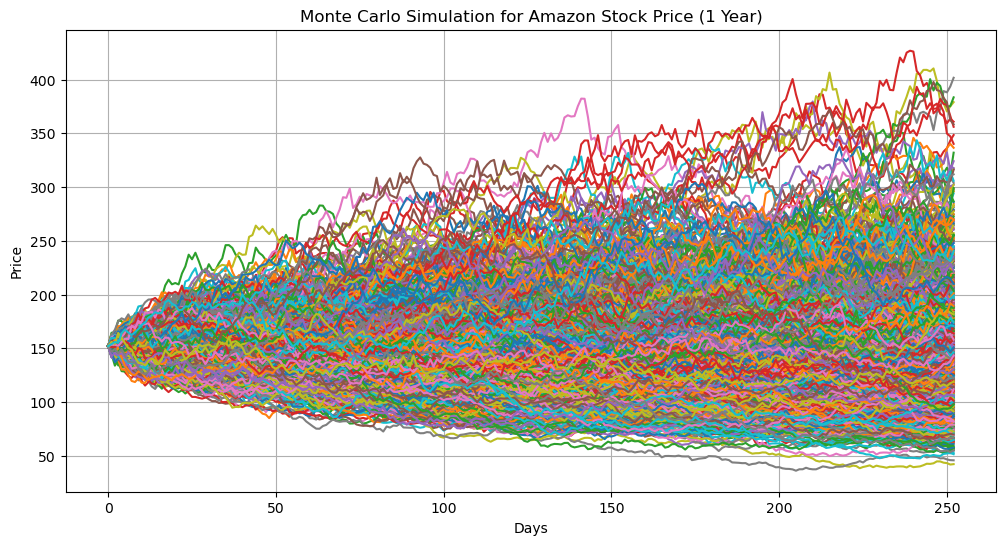

In [9]:
plt.figure(figsize=(12,6))
plt.plot(sim_df)
plt.title('Monte Carlo Simulation for Amazon Stock Price (1 Year)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [10]:
# Simulation parameters
num_simulations = 1000
num_days = 252  # 1 trading year

last_price = aramco['Close'].iloc[-1]
daily_volatility = aramco['daily_return'].std()

simulation_results = []

np.random.seed(42)  # For reproducibility

for sim in range(num_simulations):
    prices = [last_price]
    for day in range(num_days):
        price = prices[-1] * (1 + np.random.normal(0, daily_volatility))
        prices.append(price)
    simulation_results.append(prices)

# Convert to DataFrame
sim_df = pd.DataFrame(simulation_results).T
sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...,Ticker 2222.SR 32.219536 Name: 2023-12-31 0...
1,Ticker 2222.SR 32.401203 Name: 2023-12-31 0...,Ticker 2222.SR 32.99569 Name: 2023-12-31 00...,Ticker 2222.SR 31.981571 Name: 2023-12-31 0...,Ticker 2222.SR 32.399961 Name: 2023-12-31 0...,Ticker 2222.SR 32.603398 Name: 2023-12-31 0...,Ticker 2222.SR 32.423738 Name: 2023-12-31 0...,Ticker 2222.SR 31.957366 Name: 2023-12-31 0...,Ticker 2222.SR 32.129541 Name: 2023-12-31 0...,Ticker 2222.SR 32.122793 Name: 2023-12-31 0...,Ticker 2222.SR 32.035138 Name: 2023-12-31 0...,...,Ticker 2222.SR 31.851329 Name: 2023-12-31 0...,Ticker 2222.SR 32.510912 Name: 2023-12-31 0...,Ticker 2222.SR 32.376766 Name: 2023-12-31 0...,Ticker 2222.SR 32.111638 Name: 2023-12-31 0...,Ticker 2222.SR 31.253546 Name: 2023-12-31 0...,Ticker 2222.SR 32.745199 Name: 2023-12-31 0...,Ticker 2222.SR 32.346654 Name: 2023-12-31 0...,Ticker 2222.SR 31.698822 Name: 2023-12-31 0...,Ticker 2222.SR 32.618967 Name: 2023-12-31 0...,Ticker 2222.SR 32.40823 Name: 2023-12-31 00...
2,Ticker 2222.SR 32.35035 Name: 2023-12-31 00...,Ticker 2222.SR 33.382399 Name: 2023-12-31 0...,Ticker 2222.SR 31.804726 Name: 2023-12-31 0...,Ticker 2222.SR 32.467942 Name: 2023-12-31 0...,Ticker 2222.SR 32.405309 Name: 2023-12-31 0...,Ticker 2222.SR 32.451712 Name: 2023-12-31 0...,Ticker 2222.SR 31.280256 Name: 2023-12-31 0...,Ticker 2222.SR 31.821995 Name: 2023-12-31 0...,Ticker 2222.SR 31.392103 Name: 2023-12-31 0...,Ticker 2222.SR 32.005492 Name: 2023-12-31 0...,...,Ticker 2222.SR 32.212828 Name: 2023-12-31 0...,Ticker 2222.SR 32.810474 Name: 2023-12-31 0...,Ticker 2222.SR 31.605128 Name: 2023-12-31 0...,Ticker 2222.SR 32.121022 Name: 2023-12-31 0...,Ticker 2222.SR 31.62841 Name: 2023-12-31 00...,Ticker 2222.SR 32.428404 Name: 2023-12-31 0...,Ticker 2222.SR 32.35706 Name: 2023-12-31 00...,Ticker 2222.SR 31.952858 Name: 2023-12-31 0...,Ticker 2222.SR 32.429002 Name: 2023-12-31 0...,Ticker 2222.SR 32.605167 Name: 2023-12-31 0...
3,Ticker 2222.SR 32.588196 Name: 2023-12-31 0...,Ticker 2222.SR 32.806651 Name: 2023-12-31 0...,Ticker 2222.SR 31.590854 Name: 2023-12-31 0...,Ticker 2222.SR 32.151587 Name: 2023-12-31 0...,Ticker 2222.SR 32.889909 Name: 2023-12-31 0...,Ticker 2222.SR 32.650176 Name: 2023-12-31 0...,Ticker 2222.SR 31.250898 Name: 2023-12-31 0...,Ticker 2222.SR 32.606196 Name: 2023-12-31 0...,Ticker 2222.SR 31.618532 Name: 2023-12-31 0...,Ticker 2222.SR 32.131806 Name: 2023-12-31 0...,...,Ticker 2222.SR 32.202778 Name: 2023-12-31 0...,Ticker 2222.SR 31.993672 Name: 2023-12-31 0...,Ticker 2222.SR 31.715668 Name: 2023-12-31 0...,Ticker 2222.SR 32.561288 Name: 2023-12-31 0...,Ticker 2222.SR 31.393402 Name: 2023-12-31 0...,Ticker 2222.SR 32.241011 Name: 2023-12-31 0...,Ticker 2222.SR 32.255134 Name: 2023-12-31 0...,Ticker 2222.SR 31.536383 Name: 2023-12-31 0...,Ticker 2222.SR 33.461886 Name: 2023-12-31 0...,Ticker 2222.SR 32.519051 Name: 2023-12-31 0...
4,Ticker 2222.SR 33.151601 Name: 2023-12-31 0...,Ticker 2222.SR 32.626321 Name: 2023-12-31 0...,Ticker 2222.SR 31.281025 Name: 2023-12-31 0...,Ticker 2

/opt/anaconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/opt/anaconda3/lib/python3.13/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


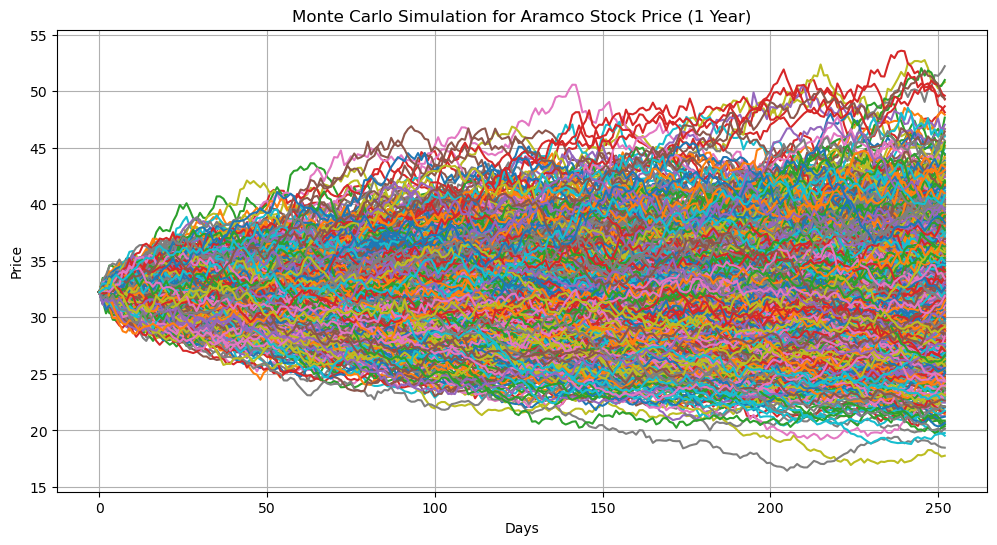

In [11]:
plt.figure(figsize=(12,6))
plt.plot(sim_df)
plt.title('Monte Carlo Simulation for Aramco Stock Price (1 Year)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

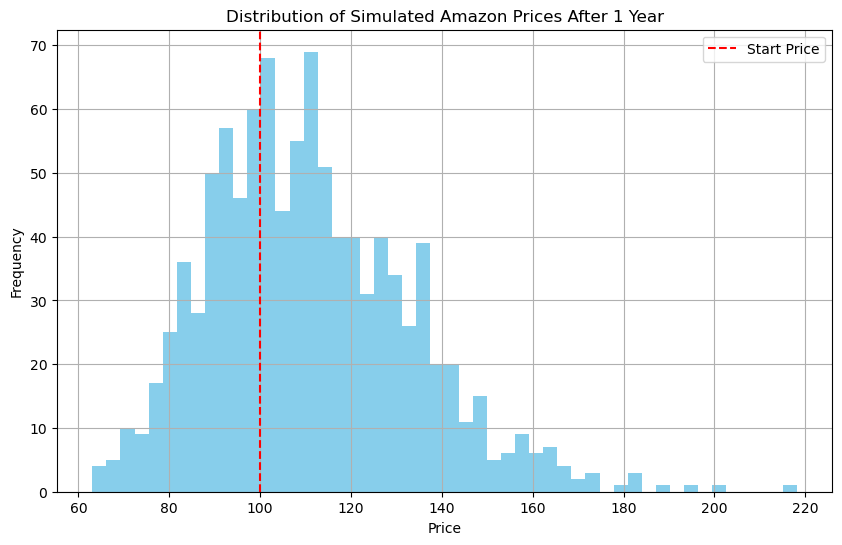

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_price = 100  # initial stock price
mu = 0.1           # expected return (10%)
sigma = 0.2        # volatility (20%)
days = 252         # number of trading days in a year
num_simulations = 1000

# Simulate price paths
simulated_price_paths = []

for _ in range(num_simulations):
    prices = [start_price]
    for _ in range(1, days):
        dt = 1 / days
        random_shock = np.random.normal(loc=0, scale=1)
        price = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shock)
        prices.append(price)
    simulated_price_paths.append(prices)

# Convert to NumPy array
simulations = np.array(simulated_price_paths)  # shape: (1000, 252)

# Get final prices
ending_prices = simulations[:, -1]  # shape: (1000,)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ending_prices, bins=50, color='skyblue')  # SINGLE COLOR
plt.axvline(x=start_price, color='red', linestyle='--', label='Start Price')
plt.title('Distribution of Simulated Amazon Prices After 1 Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig("amazon_monte_carlo_histogram.png")
plt.show()


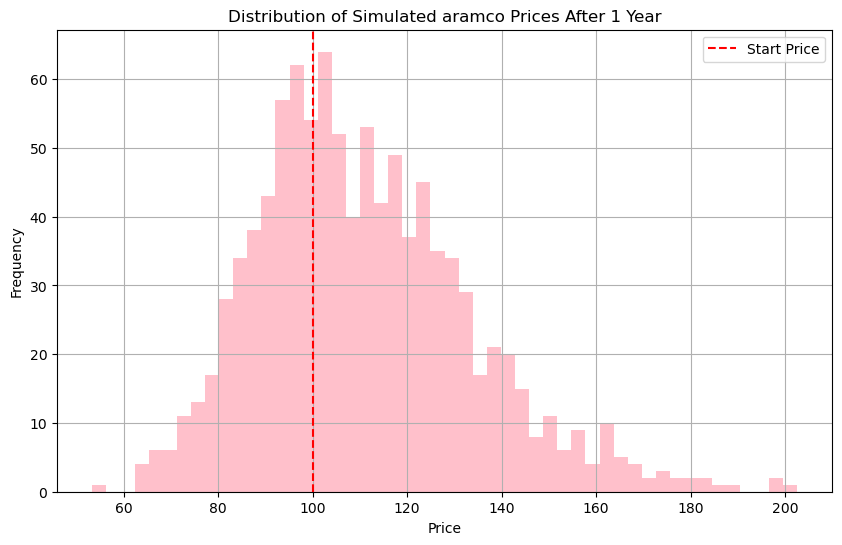

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_price = 100  # initial stock price
mu = 0.1           # expected return (10%)
sigma = 0.2        # volatility (20%)
days = 252         # number of trading days in a year
num_simulations = 1000

# Simulate price paths
simulated_price_paths = []

for _ in range(num_simulations):
    prices = [start_price]
    for _ in range(1, days):
        dt = 1 / days
        random_shock = np.random.normal(loc=0, scale=1)
        price = prices[-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shock)
        prices.append(price)
    simulated_price_paths.append(prices)

# Convert to NumPy array
simulations = np.array(simulated_price_paths)  # shape: (1000, 252)

# Get final prices
ending_prices = simulations[:, -1]  # shape: (1000,)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(ending_prices, bins=50, color='pink')  # SINGLE COLOR
plt.axvline(x=start_price, color='red', linestyle='--', label='Start Price')
plt.title('Distribution of Simulated aramco Prices After 1 Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig("aramco_monte_carlo_histogram.png")


In [14]:
def simulate_gbm(start_price, mu, sigma, num_simulations, num_days):
    dt = 1 / num_days  # Daily timestep
    simulated_paths = np.zeros((num_simulations, num_days))
    for i in range(num_simulations):
        daily_returns = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt), size=num_days)
        price_path = start_price * np.exp(np.cumsum(daily_returns))
        simulated_paths[i] = price_path
    return simulated_paths

Amazon:
 Mean: 141.40
 Std Dev: 44.17
 95% CI: 76.09 - 257.85

Aramco:
 Mean: 33.41
 Std Dev: 6.48
 95% CI: 22.95 - 47.65



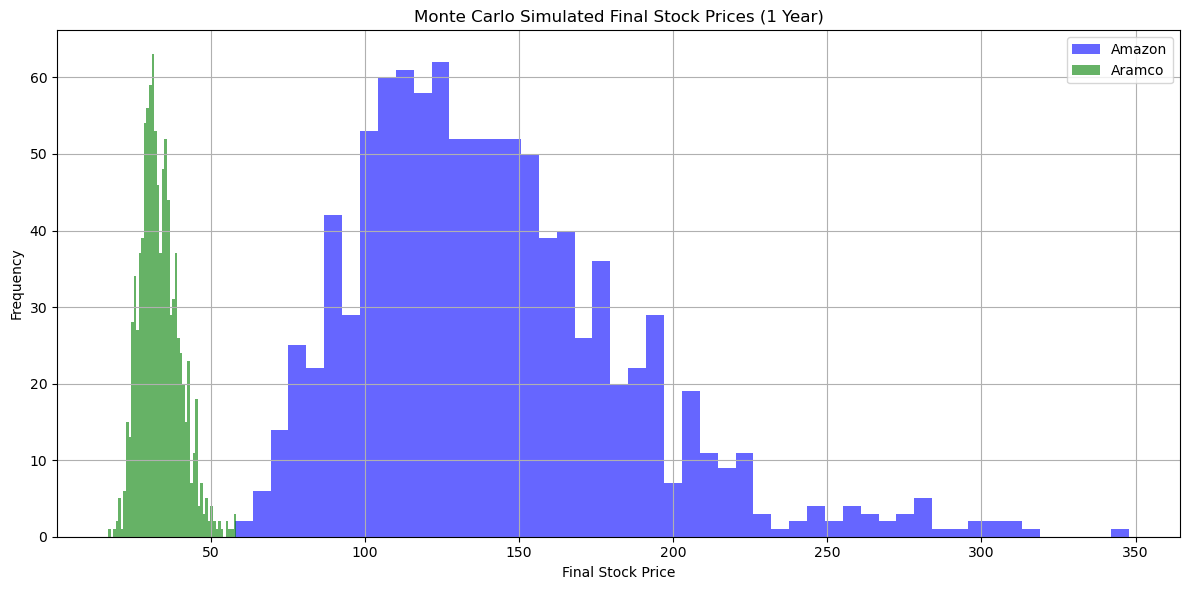

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ----- PARAMETERS -----
initial_price_amazon = 130.0
mu_amazon = 0.10      # 10% expected return
sigma_amazon = 0.30   # 30% volatility

initial_price_aramco = 32.0
mu_aramco = 0.05      # 5% expected return
sigma_aramco = 0.20   # 20% volatility

T = 1                 # 1 year
n = 252               # trading days
simulations = 1000
dt = T / n

# ----- FUNCTION -----
def monte_carlo_simulation(S0, mu, sigma, T, n, sims):
    dt = T / n
    price_paths = np.zeros((sims, n))
    for i in range(sims):
        prices = [S0]
        for _ in range(1, n):
            random_shock = np.random.normal(0, 1)
            dS = prices[-1] * (mu * dt + sigma * np.sqrt(dt) * random_shock)
            prices.append(prices[-1] + dS)
        price_paths[i] = prices
    return price_paths

# ----- SIMULATION -----
simulated_amazon = monte_carlo_simulation(initial_price_amazon, mu_amazon, sigma_amazon, T, n, simulations)
simulated_aramco = monte_carlo_simulation(initial_price_aramco, mu_aramco, sigma_aramco, T, n, simulations)

# ----- FINAL PRICES -----
ending_prices_amazon = simulated_amazon[:, -1]
ending_prices_aramco = simulated_aramco[:, -1]

# ----- ANALYSIS -----
def analyze(prices, label):
    mean = np.mean(prices)
    std = np.std(prices)
    ci = np.percentile(prices, [2.5, 97.5])
    print(f"{label}:\n Mean: {mean:.2f}\n Std Dev: {std:.2f}\n 95% CI: {ci[0]:.2f} - {ci[1]:.2f}\n")

analyze(ending_prices_amazon, "Amazon")
analyze(ending_prices_aramco, "Aramco")

# ----- HISTOGRAM -----
plt.figure(figsize=(12,6))
plt.hist(ending_prices_amazon, bins=50, alpha=0.6, label='Amazon', color='blue')
plt.hist(ending_prices_aramco, bins=50, alpha=0.6, label='Aramco', color='green')
plt.title("Monte Carlo Simulated Final Stock Prices (1 Year)")
plt.xlabel("Final Stock Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("monte_carlo_histogram.png")  # optional: saves it
plt.show()

# ----- EXPORT TO CSV -----
df = pd.DataFrame({
    'Amazon': ending_prices_amazon,
    'Aramco': ending_prices_aramco
})
df.to_csv('simulation_results.csv', index=False)